Authors: Denise Tabilas and Diane Tabilas

In this investigation, we will see if there are any correlations between fatal shootings by the police and the identities, locations, and actions of the victims. 

The type of input data is from a csv file.

We chose this topic because we thought it would be interesting to investigate one of the major problems in the United States today.

Source of data can be found from this link: 
https://github.com/washingtonpost/data-police-shootings

Import

In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict 
import collections
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans

Read data into dataframe from fatal-police-shootings-data.csv

In [558]:
df = pd.read_csv("fatal-police-shootings-data.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Drop some columns because we are not going to need them for the analysis.

In [559]:
colsToDrop = ['id', 'name', 'is_geocoding_exact', 'longitude', 'latitude', 'threat_level', 'manner_of_death', 'signs_of_mental_illness', 'body_camera']
df = df.drop(columns=colsToDrop)
df.head()

,date,armed,age,gender,race,city,state,flee
0,2015-01-02,gun,53.0,M,A,Shelton,WA,Not fleeing
1,2015-01-02,gun,47.0,M,W,Aloha,OR,Not fleeing
2,2015-01-03,unarmed,23.0,M,H,Wichita,KS,Not fleeing
3,2015-01-04,toy weapon,32.0,M,W,San Francisco,CA,Not fleeing
4,2015-01-04,nail gun,39.0,M,H,Evans,CO,Not fleeing


Find the top 5 states in data.

In [560]:
stateDict = defaultdict(int)
for state in df.state:
    stateDict[state] += 1;

sortedKeys = sorted(stateDict, key=stateDict.get, reverse=True)
for i in range(0,5):
    state =sortedKeys[i]
    print(str(i+1) + ". " + state + "     " + str(stateDict[state]))

1. CA     908
2. TX     545
3. FL     411
4. AZ     290
5. CO     216


Find top 5 cities in data 

In [561]:
cityDict = defaultdict(int)

for i in range(0, len(df)):
    cityStr = str(df.loc[i, 'city']) + ", " + str(df.loc[i, 'state'])
    cityDict[cityStr] += 1

sortedCities = sorted(cityDict, key=cityDict.get, reverse=True)
for i in range(0, 5):
    city = sortedCities[i]
    print(str(i+1) + ". " + city + "   " + str(cityDict[city]))

1. Los Angeles, CA   93
2. Phoenix, AZ   89
3. Houston, TX   65
4. Las Vegas, NV   52
5. San Antonio, TX   52


Compare the ages of victims.

<BarContainer object of 78 artists>

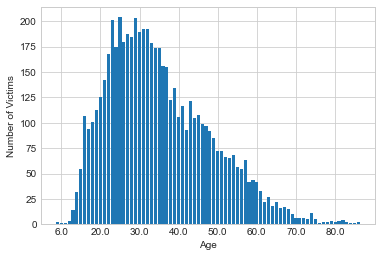

In [562]:
ageDF = pd.DataFrame(df.age)
ageDF = ageDF.dropna()
ageList = list(set(ageDF.age))
countList = []
for a in ageList:
    c = int(ageDF[ageDF.age == a].count())
    countList.append(c)
plt.xticks(np.arange(1, 80, step=10), (ageList[0], ageList[9], ageList[19], ageList[29], ageList[39], ageList[49], ageList[59], ageList[69]))
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.bar(np.arange(len(ageList)), countList, align="center")

Compare race

<AxesSubplot:ylabel='race'>

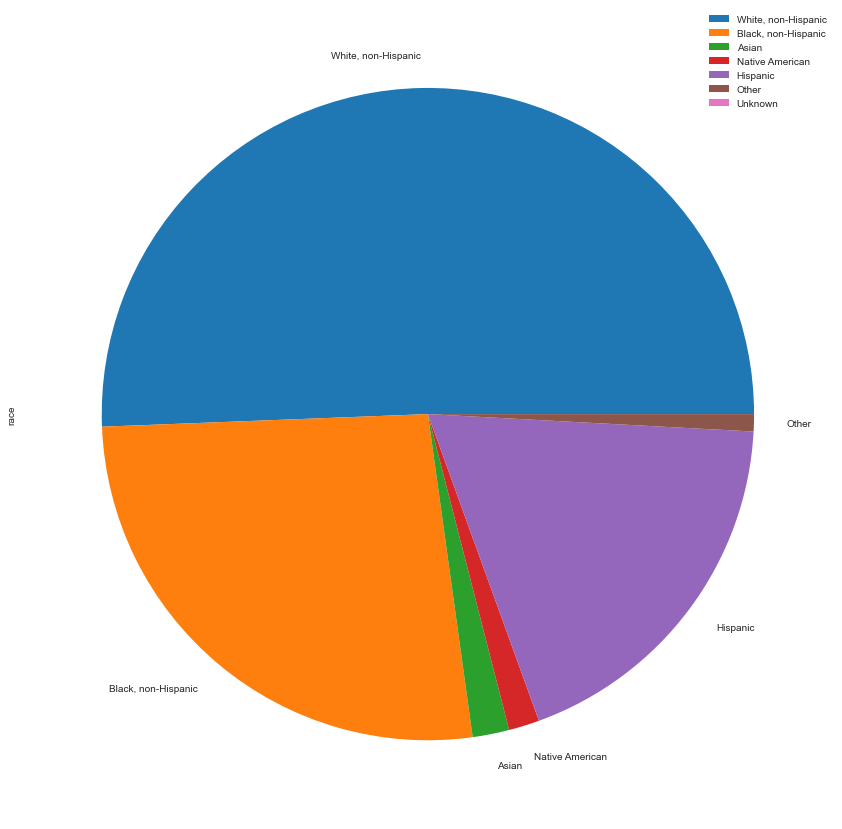

In [563]:
white = len(df[df.race=='W'])
black = len(df[df.race=='B'])
asian = len(df[df.race=='A'])
native = len(df[df.race=='N'])
hispanic = len(df[df.race=='H'])
other = len(df[df.race=='O'])
unknown = len(df[df.race=='None'])

r = {'race': [white,black,asian,native,hispanic,other,unknown]}
race = pd.DataFrame(data=r, index=['White, non-Hispanic', 'Black, non-Hispanic','Asian','Native American','Hispanic', 'Other','Unknown'])
race.plot.pie(y='race', figsize=(15, 15))


Compare armed vs. unarmed victims

In [564]:
armDF = pd.DataFrame(df.armed)
armDF = armDF.dropna()
armDict = defaultdict(int)
for a in armDF.armed:
    armDict[a] += 1

Top 'Weapons'

In [565]:
sortedArm = sorted(armDict, key=armDict.get, reverse=True)
sortedArm.remove('undetermined')
sortedArm.remove('unknown weapon')
for i in range(0, 10):
    print(str(i+1) + ". " + sortedArm[i] + ", " + str(armDict[sortedArm[i]]) + " accounts")

1. gun, 3515 accounts
2. knife, 899 accounts
3. unarmed, 399 accounts
4. toy weapon, 206 accounts
5. vehicle, 190 accounts
6. machete, 49 accounts
7. Taser, 28 accounts
8. ax, 24 accounts
9. sword, 23 accounts
10. baseball bat, 20 accounts


Bar Chart to see visual representation of the top weapons

<BarContainer object of 10 artists>

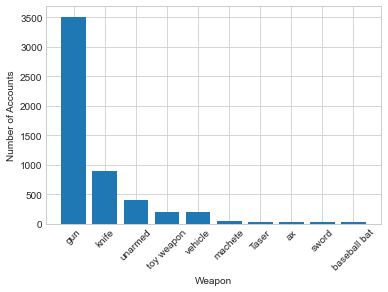

In [566]:
armXVals = []
armYVals = []
for i in range(0, 10):
    armXVals.append(sortedArm[i])
    armYVals.append(armDict[sortedArm[i]])
plt.xticks(np.arange(len(armXVals)), armXVals, rotation=45)
plt.xlabel('Weapon')
plt.ylabel('Number of Accounts')
plt.bar(np.arange(len(armXVals)), armYVals, align="center")

Compare gender 

Male: 5866
Female: 272
Percentage of Male: 95.56858911697621


<BarContainer object of 2 artists>

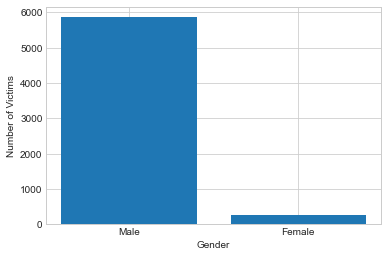

In [567]:
numMale = len(df[df.gender=='M'])
numFemale = len(df[df.gender=='F'])
print("Male: " + str(numMale))
print("Female: " + str(numFemale))
print("Percentage of Male: " + str(numMale/(numFemale + numMale)*100))
plt.xticks(np.arange(2), ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Number of Victims")
plt.bar(np.arange(2), [numMale, numFemale], align="center")


Flee or not flee

<BarContainer object of 3 artists>

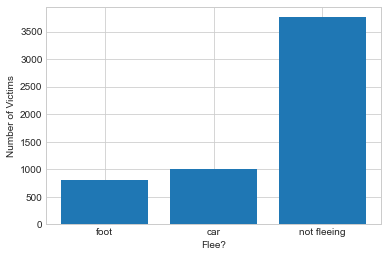

In [568]:
#flee
foot = len(df[df.flee=='Foot'])
car = len(df[df.flee=='Car'])
notflee = len(df[df.flee=='Not fleeing'])
f = {'flee': [foot,car,notflee]}
flee = pd.DataFrame(data=f,index=['foot','car','not fleeing'])
plt.xticks(np.arange(3), ['foot', 'car', 'not fleeing'])
plt.xlabel("Flee?")
plt.ylabel("Number of Victims")
plt.bar(np.arange(3), [foot,car,notflee], align="center")

XY Plot for the date vs. amount of deaths (cumulative)

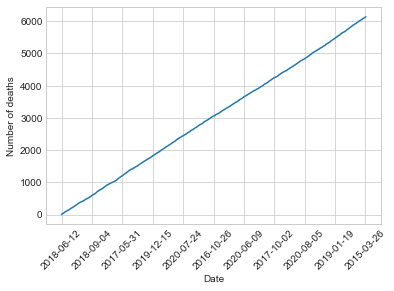

In [569]:
dateList = list(set(df.date))
deathsList = []
count = 0 #cumulative count of all deaths
for d in dateList:
    deathsList.append(len(df[df.date == d]) + count)
    count += len(df[df.date == d])
    
#create xtick list 
xTickList = []
numOfTicks = 10
step = int(len(dateList)/numOfTicks)
for i in range(0, len(dateList), step):
    xTickList.append(str(dateList[i]))
    
plt.xticks(np.arange(1, len(dateList), step), xTickList, rotation=45)    
plt.xlabel("Date")
plt.ylabel("Number of deaths")
plt.plot(dateList, deathsList)

Taking last 100 values from the data set

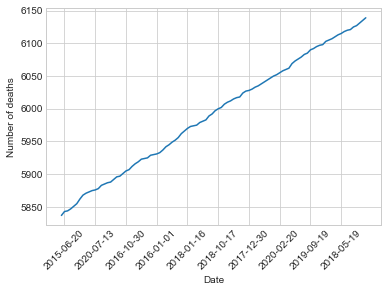

In [570]:
xVals = dateList[-100:]
yVals = deathsList[-100:]

#create xtick list 
xTickList = []
numOfTicks = 10
step = int(len(xVals)/numOfTicks)
for i in range(0, len(xVals), step):
    xTickList.append(str(xVals[i]))

plt.xticks(np.arange(1, len(xVals), step), xTickList, rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of deaths")
plt.plot(xVals, yVals)

Find correlation between the date and amount of deaths.


Convert date column to year

In [571]:
dateList = list(set(df.date))
dateDict = defaultdict(int)
for d in dateList: 
    splitd = re.split('-', d)
    newdate = int(splitd[0])
    dateDict[d] = newdate
df.replace(dateDict, inplace=True)

Create list for number of deaths

In [572]:
dateList = list(set(df.date))
dateList.sort()
deathsList = []
for d in dateList:
    deathsList.append(len(df[df.date == d]))

Create scatter plot

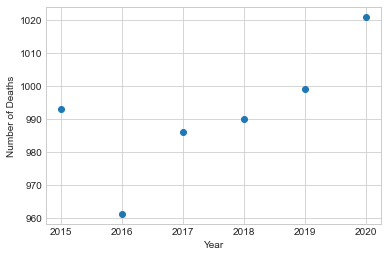

In [573]:
dateList.pop(-1)
deathsList.pop(-1)

plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.scatter(dateList, deathsList)

Linear Regression

In [574]:
import sklearn.linear_model as lm
regr = lm.LinearRegression()

Create X and y dataset

In [575]:
X = pd.DataFrame({'date':dateList})
y = deathsList

Train estimator

In [576]:
regr = regr.fit(X, y)

Plot linear regression

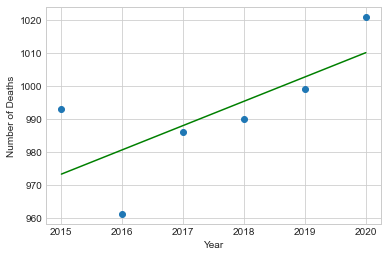

In [577]:
plt.scatter(dateList, deathsList)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')

Show how well estimator works

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [579]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
deaths_mean = np.mean(deathsList)
print('Mean Deaths per Year:', deaths_mean)
print('Percent error:', (RMSE/deaths_mean)*100)
print('R^2 value:', regr.score(X, y))

Root Mean Squared Error: 34.27693339937769
Mean Deaths per Year: 991.6666666666666
Percent error: 3.4564974856515316
R^2 value: -0.25887866602410625


Finding the correlation of unarmed deaths' ages vs. race, state, and flee


From the original data frame, we create a new data frame removing the date, city, and gender columns. 

In [580]:
df2 = df.drop(columns=['date','city','gender'])
df2.head()

,armed,age,race,state,flee
0,gun,53.0,A,WA,Not fleeing
1,gun,47.0,W,OR,Not fleeing
2,unarmed,23.0,H,KS,Not fleeing
3,toy weapon,32.0,W,CA,Not fleeing
4,nail gun,39.0,H,CO,Not fleeing


Filter by unarmed

In [581]:
df2 = df2[df2.armed=='unarmed']
df2.head()

,armed,age,race,state,flee
2,unarmed,23.0,H,KS,Not fleeing
8,unarmed,34.0,W,IA,Not fleeing
17,unarmed,36.0,B,AR,Not fleeing
62,unarmed,24.0,H,TX,Car
72,unarmed,42.0,W,OK,Foot


Remove armed column

In [582]:
df2 = df2.drop(columns=['armed'])
df2.head()

,age,race,state,flee
2,23.0,H,KS,Not fleeing
8,34.0,W,IA,Not fleeing
17,36.0,B,AR,Not fleeing
62,24.0,H,TX,Car
72,42.0,W,OK,Foot


remove nan data

In [583]:
df2 = df2.dropna()
df2.age = df2.age.astype(int)   
df2.head()

,age,race,state,flee
2,23,H,KS,Not fleeing
8,34,W,IA,Not fleeing
17,36,B,AR,Not fleeing
62,24,H,TX,Car
72,42,W,OK,Foot


change race, state, and flee to integers

In [584]:
col = ['race','state','flee']
colDict = defaultdict(int)
for x in col:
    valset = set(df2[x])
    i=0
    for v in valset:
        colDict[v]=i
        i+=1
    df2.replace(colDict,inplace=True)
print(colDict)
df2.head()

defaultdict(<class 'int'>, {'N': 0, 'B': 1, 'A': 2, 'O': 3, 'H': 4, 'W': 5, 'WV': 0, 'AZ': 1, 'MN': 2, 'NE': 3, 'NY': 4, 'ID': 5, 'AL': 6, 'MI': 7, 'TX': 8, 'SD': 9, 'CO': 10, 'MD': 11, 'FL': 12, 'IL': 13, 'NM': 14, 'UT': 15, 'ND': 16, 'CA': 17, 'DC': 18, 'LA': 19, 'HI': 20, 'VA': 21, 'AR': 22, 'CT': 23, 'MS': 24, 'IN': 25, 'OR': 26, 'GA': 27, 'WY': 28, 'MA': 29, 'VT': 30, 'NC': 31, 'TN': 32, 'NV': 33, 'OH': 34, 'KS': 35, 'SC': 36, 'WA': 37, 'IA': 38, 'MO': 39, 'OK': 40, 'KY': 41, 'NJ': 42, 'AK': 43, 'WI': 44, 'PA': 45, 'Other': 0, 'Foot': 1, 'Not fleeing': 2, 'Car': 3})


,age,race,state,flee
2,23,4,35,2
8,34,5,38,2
17,36,1,22,2
62,24,4,8,3
72,42,5,40,1


Show statistics for the data frame

In [585]:
df2.describe()

,age,race,state,flee
count,375.000000,375.000000,375.000000,375.000000
mean,32.320000,3.290667,19.922667,1.909333
std,10.947322,1.820352,12.646020,0.725615
min,6.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,10.000000,1.000000
50%,30.000000,4.000000,17.000000,2.000000
75%,38.000000,5.000000,31.500000,2.000000
max,84.000000,5.000000,45.000000,3.000000


compare age vs race,state,and flee using unsupervised machine learning
Calculate optimal k value using elbow curve


['age' 'race']


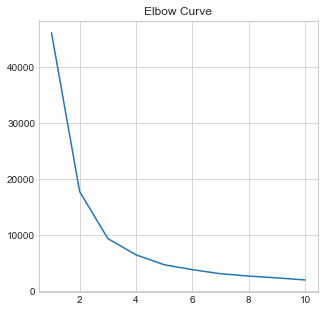

In [586]:
#age vs race

X = df2.drop(columns = ['state','flee'])
print(X.columns.values)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.title("Elbow plot")
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.style.use('seaborn-whitegrid')
plt.show() 


from the plot, k=3 because of the bend 
Now we create the model then train and test it


In [587]:
#k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


using the k-means output, we plot the age vs race

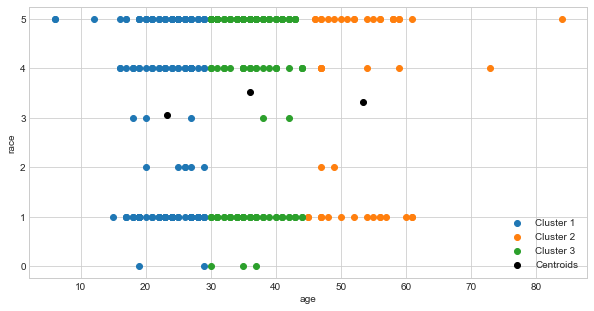

In [588]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0].age, X[y_kmeans==0].race, label='Cluster 1')
plt.scatter(X[y_kmeans==1].age, X[y_kmeans==1].race, label='Cluster 2')
plt.scatter(X[y_kmeans==2].age, X[y_kmeans==2].race, label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='Centroids')
plt.xlabel('age')
plt.ylabel('race')
plt.legend()
plt.show()


next we check the connection of age and state following the same process

['age' 'state']


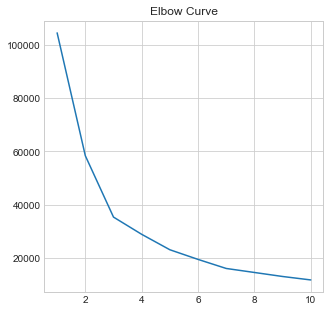

In [589]:
#age vs state

X = df2.drop(columns = ['race','flee'])
print(X.columns.values)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.title("Elbow plot")
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.style.use('seaborn-whitegrid')
plt.show() 


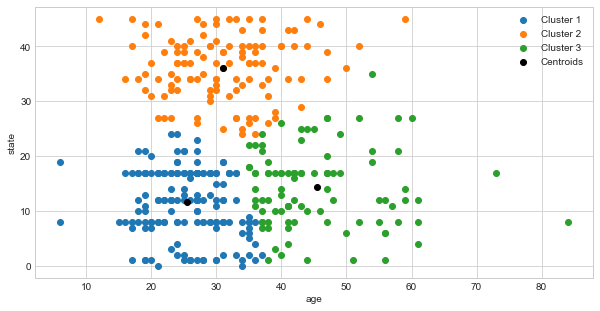

In [590]:
#k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0].age, X[y_kmeans==0].state, label='Cluster 1')
plt.scatter(X[y_kmeans==1].age, X[y_kmeans==1].state, label='Cluster 2')
plt.scatter(X[y_kmeans==2].age, X[y_kmeans==2].state, label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='Centroids')
plt.xlabel('age')
plt.ylabel('state')
plt.legend()
plt.show()


finally we see if there is a correlation between the age and flee

['age' 'flee']


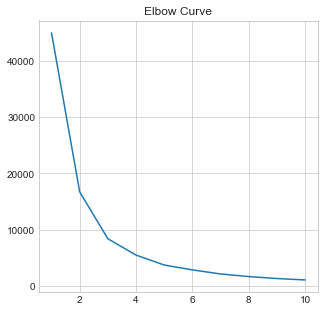

In [591]:
#age vs flee

X = df2.drop(columns = ['state','race'])
print(X.columns.values)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.title("Elbow plot")
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.style.use('seaborn-whitegrid')
plt.show() 


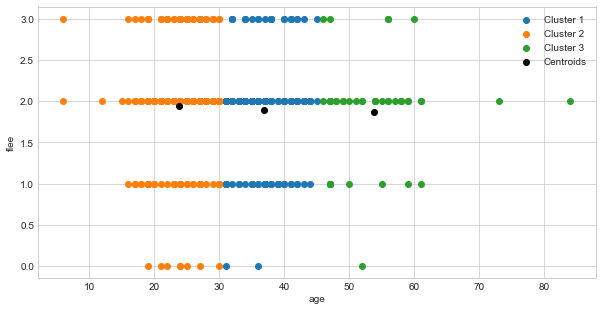

In [592]:
#k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0].age, X[y_kmeans==0].flee, label='Cluster 1')
plt.scatter(X[y_kmeans==1].age, X[y_kmeans==1].flee, label='Cluster 2')
plt.scatter(X[y_kmeans==2].age, X[y_kmeans==2].flee, label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='Centroids')
plt.xlabel('age')
plt.ylabel('flee')
plt.legend()
plt.show()


Conclusion

We see that the top states in which fatal police shootings are more prevalent in the states of California, Texas, Florida, Arizona, and Colorado, with some of the top cities in those states as well. 
According to the data, there is a peak in the chart when victims are in the age range of early 20s to mid 30s. 
Looking at the data on the armed column, a big portion of the victims are armed with a gun, and there are 399 entries where there are unarmed victims. 
We found that 95.5% of the victims were male. 
We also found that most victims were not fleeing before they were killed. 
We calculated the amount of cumulative deaths from the start date of the dataset, and from the XY plot, it looks like the numbers are steadily growing. 
Then, we calculated the number of deaths per year from the start of the dataset and we see that the numbers are slightly increasing by the year with an exception of 2016. The average deaths per year we calculated to be 991.6. We tried to use a linear regression for the scatter plot of year vs. amount of deaths, however we found that there may not be enough data to make a prediction. The root mean squared error is 27.7 and the R Squared value is 0.1.

From the age vs race plot, we can see that the race is mainly 0, 2, 4 with the centeroids closer to the 2. 
0=hispanic, 1=other, 2=black,3=native american,4=white, 5=asian
The age range is mainly between the late teens to the fifties.

'CT': 1, 'IN': 2, 'SD': 3, 'IL': 4, 'FL': 5, 'NE': 6, 'KY': 7, 'WY': 8, 'TX': 9, 'NJ': 10, 'HI': 11, 'NV': 12, 'AR': 13, 'MS': 14, 'SC': 15, 'WA': 16, 'NM': 17, 'MN': 18, 'GA': 19, 'PA': 20, 'MA': 21, 'ND': 22, 'NC': 23, 'CO': 24, 'AZ': 25, 'AL': 26, 'VT': 27, 'VA': 28, 'MO': 29, 'NY': 30, 'AK': 31, 'OH': 32, 'CA': 33, 'MI': 34, 'LA': 35, 'ID': 36, 'IA': 37, 'OK': 38, 'DC': 39, 'TN': 40, 'UT': 41, 'WV': 42, 'MD': 43, 'OR': 44, 'KS': 45
From the age vs state plot, we estimate that the clusteroids are around states: 9-10, 24-26, 32-34. Earlier we found our top five states to be California, Texas, Florida, Arizona, and Colorado. According to our dictionary, these states are within the estimates.
CA=33, TX=9, AZ=25, CO=24
Only Florida was not in the guesses FL=5 

0=other,1=car,2=foot,3=not fleeing
From the age vs flee plot,  there is an upwards trend. Most people fled by foot or weren’t fleeing. As age increases, more people are likely to not flee. We can also see that the ends of the age range are not fleeing. Something interesting to see is that there was someone under ten that fled by car. At first, we thought a baby was driving away, but after thinking a bit more, that incident may have had multiple fatalities or others that we injured. 

If we were to do more analysis, it would be interesting to be able to see if the data was grouped by the specific incident in case there were multiple deaths to see a connection.
